# Identifying wine cultivators in Italy with machine learning

## Introduction

For our analysis, the dataset contained 13 features that were 

### Importing modules required for analysis

In [43]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

In [77]:
from sklearn.datasets import load_wine
wine_features, wine_cultivator = load_wine(as_frame=True, return_X_y=True)
wine_features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<AxesSubplot:>

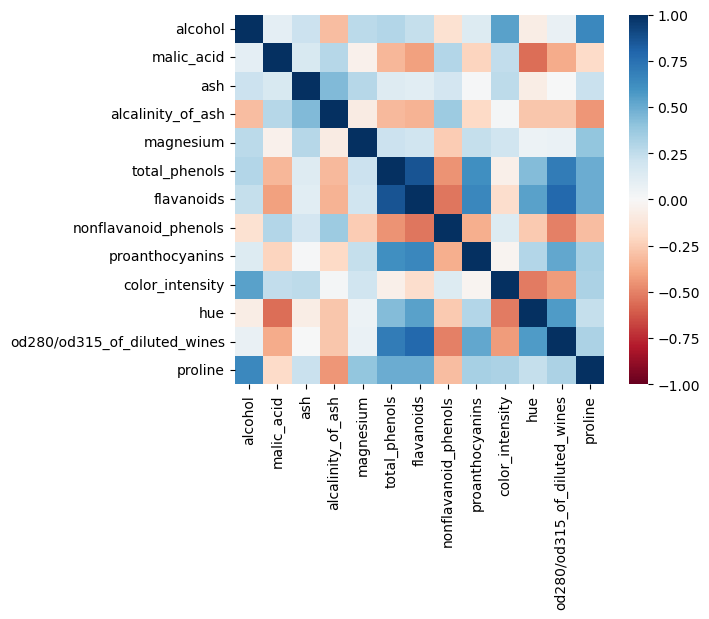

In [78]:
corr = wine_features.corr()

%matplotlib inline

import seaborn as sns

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

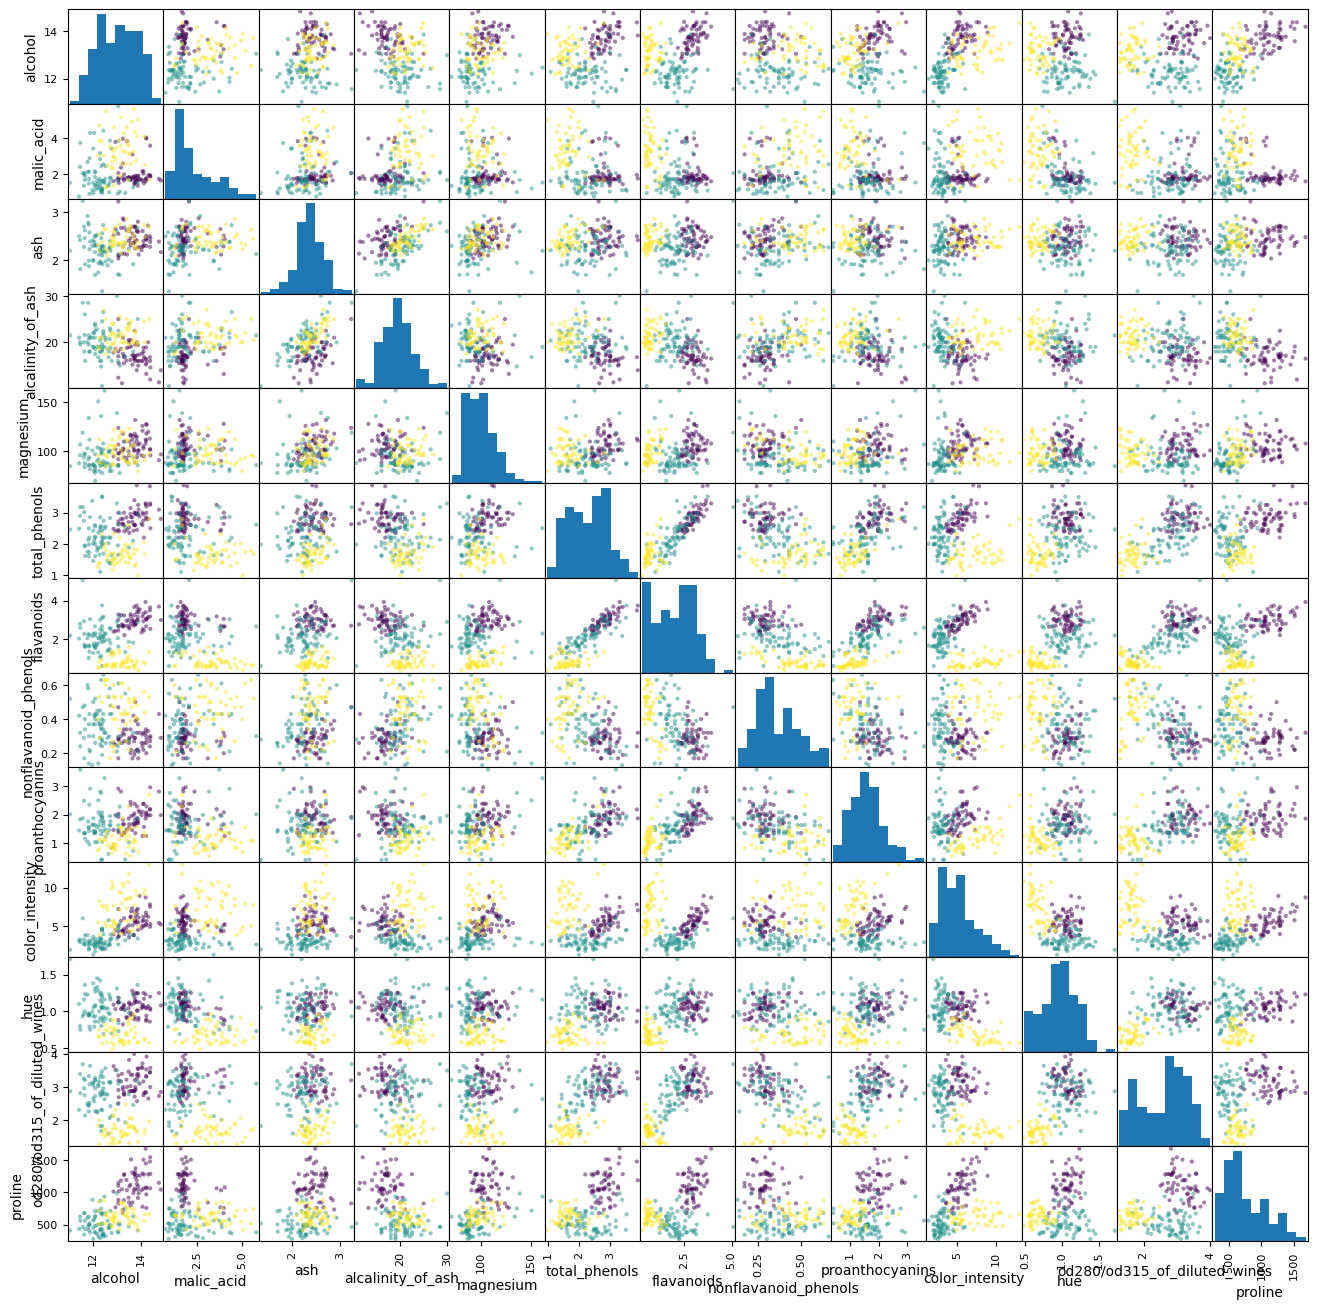

In [79]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(wine_features, figsize=(16, 16), c = wine_cultivator)

# Alcohol vs OD

<AxesSubplot:xlabel='alcohol', ylabel='od280/od315_of_diluted_wines'>

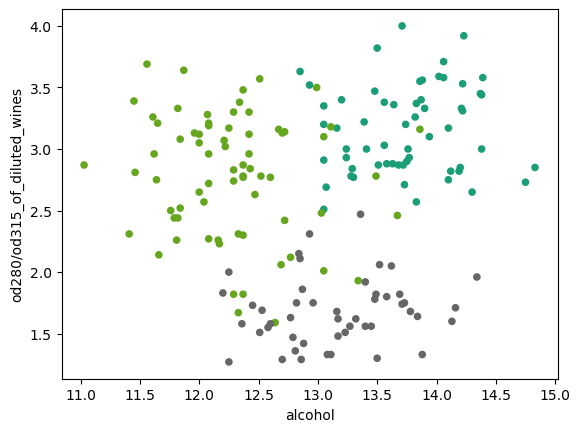

In [80]:
import pandas as pd

wine_features.plot.scatter("alcohol", "od280/od315_of_diluted_wines", c=wine_cultivator, colormap="Dark2", colorbar=False)

In [81]:
import pandas as pd
alc_od = pd.DataFrame(wine_features, columns=["alcohol", "od280/od315_of_diluted_wines"])
alc_od

,alcohol,od280/od315_of_diluted_wines
0,14.23,3.92
1,13.20,3.40
2,13.16,3.17
3,14.37,3.45
4,13.24,2.93
...,...,...
173,13.71,1.74
174,13.40,1.56
175,13.27,1.56
176,13.17,1.62


In [175]:
from sklearn.model_selection import train_test_split

train_alc_od, test_alc_od, train_y, test_y = train_test_split(alc_od, wine_cultivator, random_state=42)

train_alc_od.head()


,alcohol,od280/od315_of_diluted_wines
2,13.16,3.17
100,12.08,2.96
122,12.42,3.12
154,12.58,1.55
51,13.83,3.37


In [89]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=28)
model.fit(train_alc_od, train_y)

KNeighborsClassifier(n_neighbors=28)

In [90]:
model.score(test_alc_od, test_y) 

0.8666666666666667

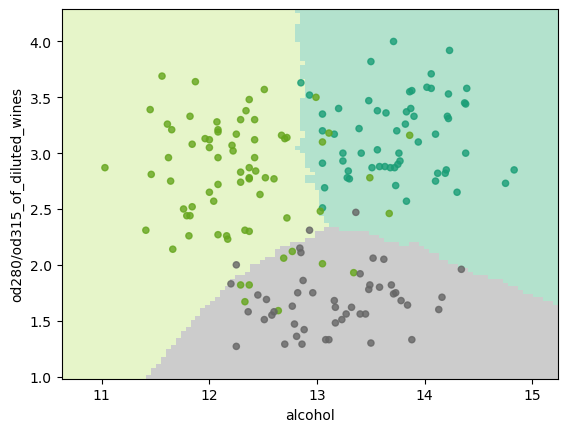

In [91]:
plot_knn(model, alc_od, wine_cultivator) 

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 51),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_alc_od, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

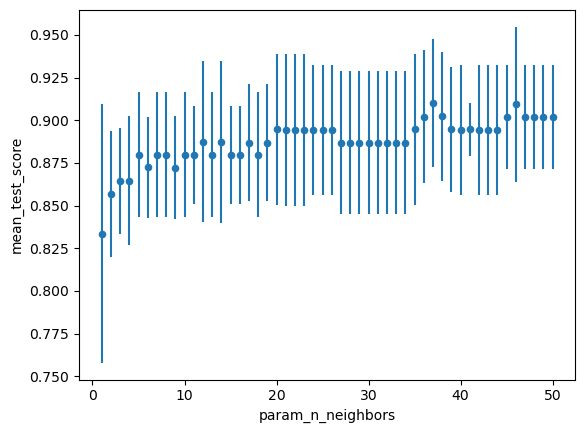

In [146]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [147]:
model.score(test_alc_od, test_y)

0.8444444444444444

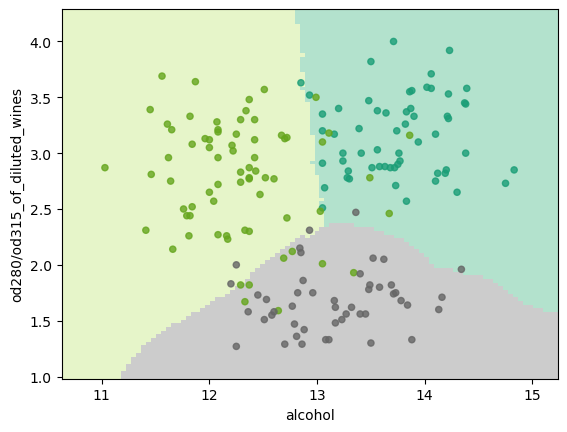

In [94]:
plot_knn(model, alc_od, wine_cultivator) 

# OD vs proline

In [156]:
import pandas as pd
OD_prol = pd.DataFrame(wine_features, columns=["od280/od315_of_diluted_wines", "proline"])
OD_prol

,od280/od315_of_diluted_wines,proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0
...,...,...
173,1.74,740.0
174,1.56,750.0
175,1.56,835.0
176,1.62,840.0


In [157]:
from sklearn.model_selection import train_test_split

train_OD_prol, test_OD_prol, train_y, test_y = train_test_split(OD_prol, wine_cultivator, random_state=42)

In [159]:
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier(n_neighbors=5)
model_3.fit(train_OD_prol, train_y)

KNeighborsClassifier()

In [160]:
model_3.score(test_OD_prol, test_y)

0.6888888888888889

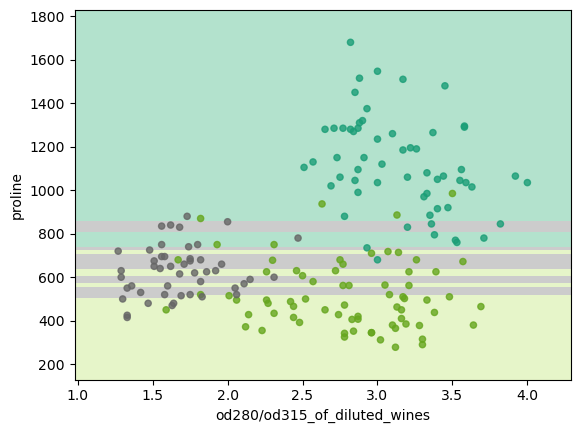

In [161]:
plot_knn(model_3, OD_prol, wine_cultivator)

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 51),
}
model3_CV = GridSearchCV(KNeighborsClassifier(), parameters)
model3_CV.fit(train_OD_prol, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

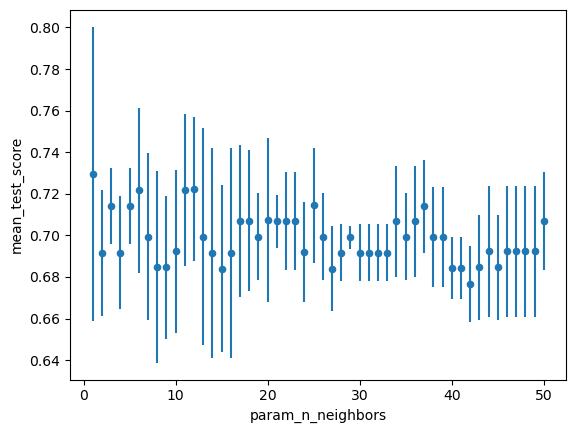

In [163]:
cv_results = pd.DataFrame(model3_CV.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [164]:
model3_CV.score(test_OD_prol, test_y)

0.6888888888888889

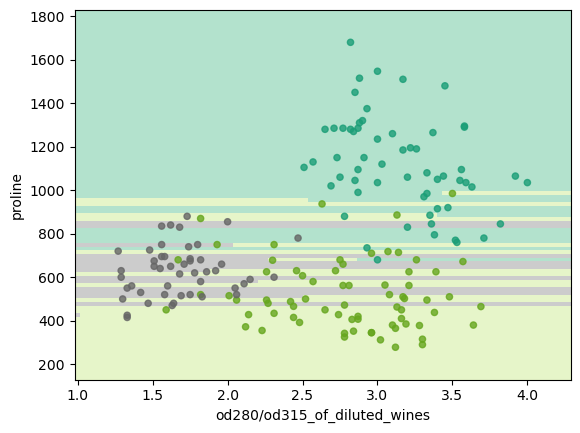

In [165]:
plot_knn(model3_CV, OD_prol, wine_cultivator)

# Alcohol vs flavanoids

In [100]:
import pandas as pd
alc_flav = pd.DataFrame(wine_features, columns=["alcohol", "flavanoids"])
alc_flav

,alcohol,flavanoids
0,14.23,3.06
1,13.20,2.76
2,13.16,3.24
3,14.37,3.49
4,13.24,2.69
...,...,...
173,13.71,0.61
174,13.40,0.75
175,13.27,0.69
176,13.17,0.68


In [152]:
from sklearn.model_selection import train_test_split

train_alc_flav, test_alc_flav, train_y, test_y = train_test_split(alc_flav, wine_cultivator, random_state=42)

In [153]:
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier(n_neighbors=40)
model_2.fit(train_alc_flav, train_y)

KNeighborsClassifier(n_neighbors=40)

In [154]:
model_2.score(test_alc_flav, test_y)

0.9111111111111111

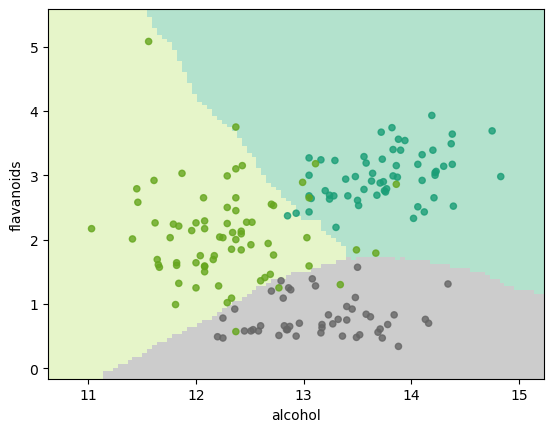

In [155]:
plot_knn(model_2, alc_flav, wine_cultivator) 

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 51),
}
model2_CV = GridSearchCV(KNeighborsClassifier(), parameters)
model2_CV.fit(train_alc_flav, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001903,0.000582,0.002740,0.001264,1,{'n_neighbors': 1},0.925926,0.851852,0.925926,0.884615,0.923077,0.902279,0.029684,45
1,0.000893,0.000228,0.001468,0.000358,2,{'n_neighbors': 2},0.851852,0.925926,0.851852,0.846154,0.846154,0.864387,0.030875,50
2,0.000771,0.000064,0.001315,0.000144,3,{'n_neighbors': 3},0.888889,0.962963,0.925926,0.884615,0.923077,0.917094,0.028524,35
3,0.000879,0.000069,0.001284,0.000077,4,{'n_neighbors': 4},0.888889,0.925926,0.925926,0.884615,0.884615,0.901994,0.019602,46
4,0.000765,0.000021,0.001196,0.000040,5,{'n_neighbors': 5},0.925926,0.925926,0.925926,0.846154,0.923077,0.909402,0.031643,41


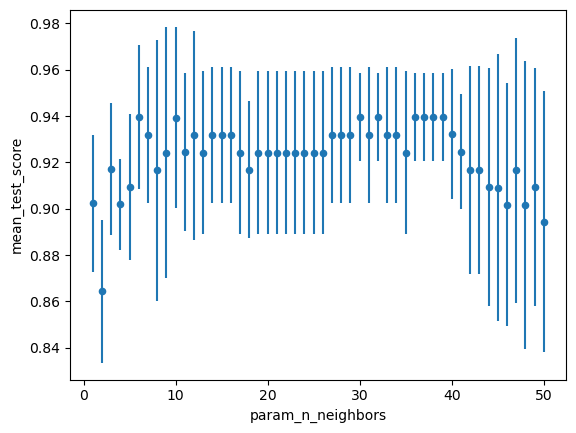

In [167]:
cv_results = pd.DataFrame(model2_CV.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")
cv_results.head()

In [150]:
model2_CV.score(test_alc_flav, test_y)

0.9111111111111111

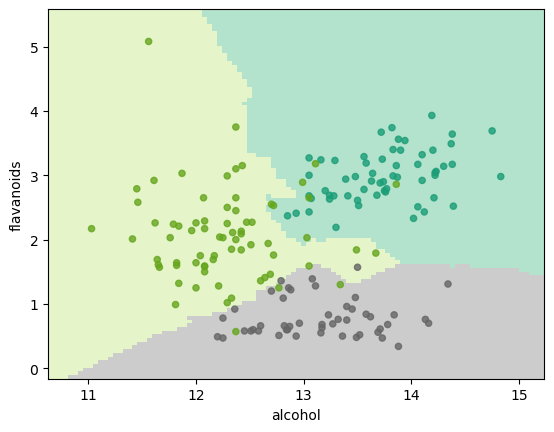

In [151]:
plot_knn(model2_CV, alc_flav, wine_cultivator)